# Trabalho 1 - MO651
### Professora Esther Columbini
#### Tito Barbosa Rezende RA 025327
#### João Paulo
#### Elcio Pereira de Souza Junior RA 262952

### Pré-requisitos

In [192]:
%pip install matplotlib
%pip install numpy
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys, time
sys.path.insert(0, '../src')
from robot import Robot
import utils
import matplotlib.pyplot as plt
import numpy as np
import vrep
import math

## Definindo nosso objeto Robô e testando conexão e API

In [29]:
robot = Robot()

Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.


Testando os sensores

In [3]:
print ('Sensores Ultrassônicos')
print (robot.read_ultrassonic_sensors())

Sensores Ultrassônicos
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.588206946849823, 0.4594201445579529, 0.445424884557724, 5.0, 5.0, 5.0, 5.0]


In [79]:
print ('Laser')
print (robot.read_laser())

Laser
[-1.5467581748962402, -4.65321159362793, 0.06299962848424911, -1.5248212814331055, -4.683115482330322, 0.06299962848424911, -1.5084712505340576, -4.731417179107666, 0.06299962103366852, -0.9260308742523193, -4.613774299621582, 0.06299960613250732, -0.8948521614074707, -4.6048431396484375, 0.06299960613250732, -0.8619675636291504, -4.585856914520264, 0.06299960613250732, -0.8312958478927612, -4.57735538482666, 0.06299960613250732, -0.8008056879043579, -4.568903923034668, 0.06299960613250732, -0.7705289125442505, -4.560712814331055, 0.06299960613250732, -0.7404220104217529, -4.552565097808838, 0.06299960613250732, -0.7089042663574219, -4.53436803817749, 0.06299960613250732, -0.679221510887146, -4.526506423950195, 0.06299960613250732, -0.6497249603271484, -4.518892765045166, 0.06299960613250732, -0.6189804077148438, -4.501142501831055, 0.06299960613250732, -0.589856743812561, -4.493687629699707, 0.06299960613250732, -0.5609019994735718, -4.4864726066589355, 0.06299960613250732, -0.5

Testando Visão do Robo

In [77]:
def take_picture():
    vision_snapshot = robot.read_vision_sensor()
    resolution = vision_snapshot[0]
    img = vision_snapshot[1]
    rbgimage = utils.vrep2array(img, resolution)
    plt.imshow(rbgimage)
    plt.show()

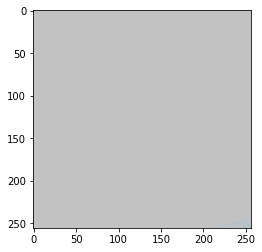

In [78]:
take_picture()

Testando a posição global do Robô

In [202]:
print('Posição')
print(robot.get_current_position())
print('Orientação')
print(robot.get_current_orientation())

Posição
[-2.1256661415100098, -0.9218891263008118, 0.1386823207139969]
Orientação
[0.0015533780679106712, -0.0012059841537848115, 0.9447335600852966]


Testando atuadores (movimentação)

Velocidade em m/s

Velocidade angular em rad/s

(retire os comentários para testar e movimentar o robo)

In [59]:
robot.set_left_velocity(1)

In [60]:
robot.stop()

In [277]:
robot.set_right_velocity(2)
robot.set_left_velocity(2)

In [67]:
robot.set_right_velocity(2)

In [81]:
#robot.stop()

In [5]:
robot.set_velocity(1,1) #V, W

In [6]:
robot.stop()

## Modelo Kinemático

### Sensor Laser

In [87]:
class Laser_sensor:
    def __init__(self,robot):
        self.robot = robot

    def update_robot_frame_reading(self):
        laser_flatten_readings = np.array(self.robot.read_laser())
        laser_readings = laser_flatten_readings.reshape((len(laser_flatten_readings)//3, 3))
        self.laser_x = laser_readings[:,0]
        self.laser_y = laser_readings[:,1]
laser_sensor = Laser_sensor(robot)
laser_sensor.update_robot_frame_reading()

In [92]:
def plot_lase_robot_frame():
    fig, ax = plt.subplots()
    #posição dos feixes laser
    ax.scatter(laser_sensor.laser_x, laser_sensor.laser_y, 3, c='g', marker='o')
    #posição do centro do robo
    ax.scatter(0, 0, 40, c='b', marker='o')
    plt.show()

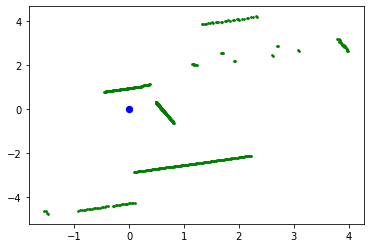

In [93]:
plot_lase_robot_frame()

In [98]:
# Vamos mudar a posição do robo e ler novamente
robot.set_left_velocity(1)
robot.set_right_velocity(2)
time.sleep(5)
robot.stop()

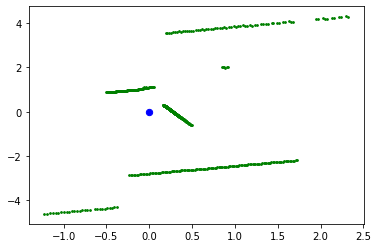

In [99]:
laser_sensor.update_robot_frame_reading()
plot_lase_robot_frame()

### Sensor Ultrassonico

Para obter a leitura correta dos sensores de proximidade, precisamos transformar a leitura do sensor em um ponto X,Y em relação ao frame do robo.


In [89]:
class Us_sensor:
    def __init__(self,robot):
        orientation_angles = np.array([90,50,30,10,-10,-30,-50,-90,-90,-130,-150,-170,170,150,130,90])
        orientation_rad = np.radians(orientation_angles)
        self.data = {
        "prefix" : "Pioneer_p3dx_ultrasonicSensor",
        "ids" : np.arange(1,17,1), "handles" : np.zeros(16, dtype=int), 
        "positions" :  np.zeros((16,3),dtype=float),
        "angles_deg": orientation_angles,
        "angles_rad": orientation_rad,
        "raw_reading": np.zeros(16),
        "robot_frame_reading": np.zeros((16,2),dtype=float)
        }
        self.robot = robot
        
        for i,sensor_i in enumerate(self.data['ids']):
            ret,handle = vrep.simxGetObjectHandle(self.robot.clientID, self.data['prefix'] + str(sensor_i), vrep.simx_opmode_oneshot_wait)
            self.data['handles'][i] = handle
            ret, pos = vrep.simxGetObjectPosition(self.robot.clientID, handle, self.robot.robot_handle, vrep.simx_opmode_oneshot_wait)
            #ret, ang = vrep.simxGetObjectOrientation(robot.clientID, handle, robot.robot_handle, vrep.simx_opmode_oneshot_wait)
            self.data['positions'][i,:] = pos
            #ultrassonic_sensors[sensor_i,4:7] = ang
    
    def update_raw_reading(self):
        self.data["raw_reading"] = np.array(self.robot.read_ultrassonic_sensors())
    
    def update_robot_frame_reading(self):
        self.update_raw_reading()
        for i, proximity in enumerate(us_sensors.data["raw_reading"]):
            if proximity == 5 or proximity < 0.1:
                self.data["robot_frame_reading"][i] = np.zeros(2)
            else:
                self.data["robot_frame_reading"][i] = self.proximity_robot_frame(i+1,proximity).flatten()
                
        #toRobotFrame = lambda sensorId,proximity: self.proximity_robot_frame(sensorId,proximity)
        #self.data["robot_frame_reading"] = toRobotFrame(range(1,17,1),us_sensors.data["raw_reading"])
    
    #Calcula o ponto no frame do robo, referente a leitura de cada sensor de proximidade
    def proximity_robot_frame(self,sensorId, proximity):
        index = sensorId -1
        angulars = self.data["angles_rad"][index]
        #Matriz de rotação
        rot_matrix = np.array([[math.cos(angulars),-math.sin(angulars)],[math.sin(angulars),math.cos(angulars)]])
        #Rotacionando a leitura
        distXY = np.dot(rot_matrix , np.array([[proximity],[0]]))
        #Matriz de translação
        posicao_sensor_x = self.data["positions"][index][0]
        posicao_sensor_y = self.data["positions"][index][1]
        transXY=np.array([[distXY[0][0]+posicao_sensor_x],[distXY[1][0]+posicao_sensor_y]])
        return transXY

us_sensors = Us_sensor(robot)

As leituras brutas do sensor ultrassonico seriam

In [90]:
us_sensors.update_raw_reading()
us_sensors.data["raw_reading"]

array([0.7707352 , 5.        , 0.34134805, 0.34382036, 0.36863858,
       0.47670981, 0.81171447, 5.        , 5.        , 5.        ,
       5.        , 5.        , 5.        , 5.        , 0.70393479,
       0.70118672])

Enquanto que as leituras dos sensores ultrassonicos rotacionadas e trasladadas para o frame do robo seriam

In [91]:
us_sensors.update_robot_frame_reading()
us_sensors.data["robot_frame_reading"]

array([[ 0.10637665,  0.90892363],
       [ 0.        ,  0.        ],
       [ 0.48621151,  0.25381814],
       [ 0.54777826,  0.08698114],
       [ 0.5722217 , -0.09129014],
       [ 0.60340961, -0.3168709 ],
       [ 0.67729042, -0.74206136],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.61203924,  0.65949999],
       [-0.11032319,  0.83937478]])

Localizando então a posição dos sensores em relação ao frame do robo, em vermelho, e os pontos resultados de leitura

In [100]:
def plot_us_robot_frame():
    fig, ax = plt.subplots()
    #posição dos sensores US
    ax.scatter(us_sensors.data['positions'][:,0], us_sensors.data['positions'][:,1], 10, c='r', marker='o')
    #posição do centro do robo
    ax.scatter(0, 0, 40, c='b', marker='o')
    #posição dos pontos lidos pelo sensor ultrassonico
    ax.scatter(us_sensors.data['robot_frame_reading'][:,0], us_sensors.data['robot_frame_reading'][:,1], 10, c='black', marker='.')

    plt.show()

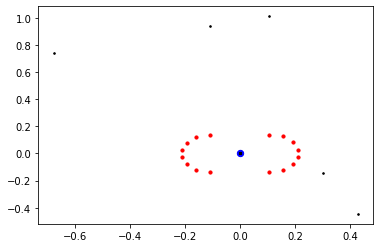

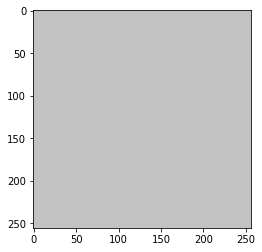

In [101]:
us_sensors.update_robot_frame_reading()
plot_us_robot_frame()
take_picture()

In [104]:
#vamos mudar a posição do robo e repetir a leitura
robot.set_left_velocity(-3)
robot.set_right_velocity(-2)
time.sleep(5)
robot.stop()

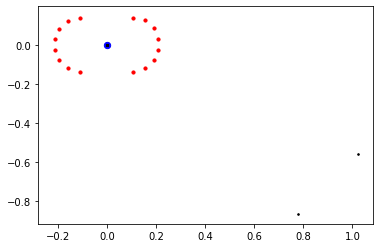

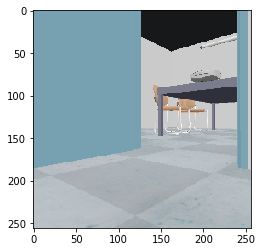

In [105]:
us_sensors.update_robot_frame_reading()
plot_us_robot_frame()
take_picture()

## Modelo cinematico direto

In [209]:
class Kinematic_model:
    def __init__(self,robot):
        self.robot = robot
        
        #Ao ser criado, coleta a referencia de zero do robo
        pos = self.robot.get_current_position()
        self.initial_pos_x = pos[0]
        self.initial_pos_y = pos[1]
        orientation = self.robot.get_current_orientation()
        self.initial_orientation = orientation[2]

    def move_foward(self,vel,seconds):
        

In [210]:
kinematics = Kinematic_model(robot)

-1.6674000024795532
-0.32915785908699036
0.9087989330291748


## Odometria

In [ ]:
import sys
sys.path.insert(0, '../lib')
import vrep
import math
import time
import matplotlib.pyplot as plt
import numpy as np

vrep.simxFinish(-1)
clientID = vrep.simxStart('127.0.0.1', 19997, True, True, 5000, 5)
if clientID != -1:
    print("Connected to remoteApi server.")
    ret1, motorLeft = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx_leftMotor", vrep.simx_opmode_oneshot_wait)
    ret2, motorRight = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx_rightMotor", vrep.simx_opmode_oneshot_wait)

    ret3, robot_handle = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx", vrep.simx_opmode_oneshot_wait)

    ret4, previousJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_streaming)
    ret5, previousJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_streaming)
    totalJointPosition = 0
    odometry = [0, 0]
    ang = 0
    ret8, previousPosition = vrep.simxGetObjectPosition(clientID, robot_handle, -1, vrep.simx_opmode_oneshot_wait)
    # function to show the plot 
    plt.ion()
    fig, ax = plt.subplots()
    x, y = [], []
    # naming the x axis 
    plt.xlabel('x - axis')
    # naming the y axis 
    plt.ylabel('y - axis')
    x = [previousPosition[0], previousPosition[0]]
    y = [previousPosition[1], previousPosition[1]]
    # giving a title to my graph 
    plt.title('Odometry vs Ground Truth')

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.draw()
    color = ['blue', 'red']
    l1 = ['Truth', 'Odometry']
    sc = ax.scatter(x[0], y[0], s=5, edgecolors='none', c=color[0], label=l1[0])
    sc = ax.scatter(x[1], y[1], s=5, edgecolors='none', c=color[1], label=l1[1])
    fig.canvas.draw()
    ax.legend()
    plt.show()

    ##    v0=2
    ##    vLeft=v0
    ##    vRight=v0

    # diametro da roda = 195mm; comprimento do eixo = 381mm
    radius = 0.195 / 2
    L = 0.381 / 2
    # vrep.simxSetJointTargetVelocity(clientID,motorLeft,0,vrep.simx_opmode_streaming)
    # vrep.simxSetJointTargetVelocity(clientID,motorRight,0,vrep.simx_opmode_streaming)
    while (v0 > 0):
        jl, actualJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_buffer)
        jr, actualJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_buffer)
        dxL = actualJointPosition - previousJointPosition
        dxR = actualJointPositionR - previousJointPositionR

        if (dxL >= 0):
            dxL = math.fmod(dxL + math.pi, 2 * math.pi) - math.pi
        else:
            dxL = math.fmod(dxL - math.pi, 2 * math.pi) + math.pi

        if (dxR >= 0):
            dxR = math.fmod(dxR + math.pi, 2 * math.pi) - math.pi
        else:
            dxR = math.fmod(dxR - math.pi, 2 * math.pi) + math.pi

        ret4, previousJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_oneshot)
        ret5, previousJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_oneshot)
        # vrep.simxSetFloatSignal(clientID,"leftEncoder",totalJointPosition,vrep.simx_opmode_oneshot_wait)
        ret9, position = vrep.simxGetObjectPosition(clientID, robot_handle, -1, vrep.simx_opmode_oneshot_wait)
        newposition = math.sqrt(
            math.pow(previousPosition[0] - position[0], 2) + math.pow(previousPosition[1] - position[1], 2))

        j = [round(dxL, 3), round(dxR, 3)]
        # print(j)
        if (round(dxR, 3) != round(dxL, 3)):
            ang = ang - (radius * dxL / (2 * L)) + (radius * dxR / (2 * L))
        else:
            ang = ang
        dist0 = (radius * dxL / 2) + (radius * dxR / 2)

        rotXY = np.dot(np.array([[math.cos(ang), -math.sin(ang)], [math.sin(ang), math.cos(ang)]]),
                       np.array([[dist0], [0]]))
        print(dist0)
        transXY = np.array([[rotXY[0][0] + previousPosition[0]], [rotXY[1][0] + previousPosition[1]]])
        previousPosition = [transXY[0][0], transXY[1][0]]
        x = [position[0], transXY[0][0]]
        y = [position[1], transXY[1][0]]
        color = ['blue', 'red']
        l1 = ['Truth', 'Odometry']
        sc = ax.scatter(x, y, s=5, edgecolors='none', c=color, label=l1)
        fig.canvas.draw()
        time.sleep(0.1)
else:
    vrep.simxFinish(clientID)
    sys.exit("\033[91m ERROR: Unable to connect to remoteApi server. Consider running scene before executing script.")
